# Assemble Boston dataframe

In [2]:
import pandas as pd
%matplotlib inline
import glob
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# read in the data
datafiles = glob.glob('../Data/Boston/hubway_trips.csv')
datafiles

['../Data/Boston/hubway_trips.csv']

In [121]:
df = pd.read_csv('../Data/Boston/hubway_trips_datetime.csv')

In [164]:
df.columns

Index([u'Unnamed: 0', u'seq_id', u'hubway_id', u'status', u'duration',
       u'start_date', u'stationid', u'end_date', u'end_statn', u'bike_nr',
       u'subsc_type', u'zip_code', u'birth_date', u'gender', u'start_day',
       u'nrides'],
      dtype='object')

In [167]:
duration = df["duration"]

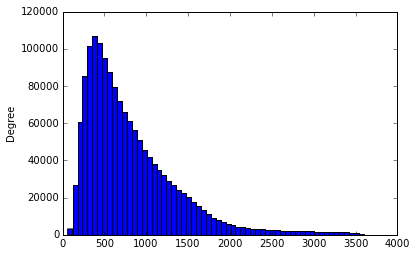

In [174]:
ok = duration < 3600
duration = duration[ok]
ok = duration > 60
duration = duration[ok]
duration.plot(kind="hist",bins=60)

In [186]:
histduration, xhist = np.histogram(duration, bins=60, density=True)

In [190]:
histduration = histduration * (xhist[1] - xhist[0])

In [191]:
histdf = pd.Series(histduration)

In [192]:
histdf.to_csv('../Data/Boston/ridelengthpdf.csv')

###### Add features for number of rides per station.  Appoximate number of stations as number of unique start stations.

In [123]:
databydaygroup = df.groupby(["stationid", "start_day"], as_index=False)

In [155]:
databyday = databydaygroup.agg({"nrides": lambda x: x.sum(), "duration": lambda x: np.median(x)})

In [156]:
temp = databyday['start_day']

In [157]:
t1 = pd.DatetimeIndex(temp)

In [158]:
databyday['dayofweek'] = t1.dayofweek

In [159]:
databyday = databyday[databyday['dayofweek'] < 5]

In [160]:
databyday['ndays'] = np.ones(len(databyday))

In [163]:
databyday

,stationid,start_day,duration,nrides,dayofweek,ndays
0,3,2011-07-28,641.0,8,3,1
1,3,2011-07-29,203.5,6,4,1
4,3,2011-08-01,963.5,8,0,1
5,3,2011-08-02,278.0,3,1,1
6,3,2011-08-03,617.0,6,2,1
7,3,2011-08-04,1003.5,6,3,1
8,3,2011-08-05,635.5,14,4,1
11,3,2011-08-08,896.0,11,0,1
12,3,2011-08-09,686.0,11,1,1
13,3,2011-08-10,846.0,8,2,1


In [161]:
databystation = databyday.groupby('stationid', as_index=False).agg({'nrides': lambda x: x.sum(), 'ndays': lambda x: x.sum(), 'duration': lambda x: np.median(x)})

In [162]:
databystation.to_csv('../Data/Boston/HubwayRidesDays.csv')

###### Add feature for origin and destination density

In [147]:
databystation = pd.read_csv('../Data/Boston/HubwayRidesDays.csv')
station = pd.read_csv('../Data/Boston/StationGroup3.csv')
station = station.rename(columns = {'id': 'stationid'})
databystation = databystation.merge(station, on='stationid')
databystation = databystation.drop(['terminal', 'station', 'status', 'municipal'], axis=1)
databystation = databystation.drop('Unnamed: 0', axis=1)
databystation['ridesperday'] = databystation['nrides'] / databystation['ndays']
databystation.to_csv('../Data/Boston/FeaturesGroup4.csv')

In [133]:
station

,Unnamed: 0,stationid,terminal,station,municipal,lat,lng,status,originpop,originwork,originsubway,destpop,destwork,destsubway
0,0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing,130012.147272,171462.091932,5983.553086,601148.616046,1005202.928000,60598.207749
1,1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing,121321.874735,269727.082761,13801.134297,984236.947561,1747213.154600,100287.611125
2,2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing,138675.634712,218971.853238,12123.716374,757016.768986,1347828.712930,78405.994583
3,3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing,93879.649000,282357.974491,30573.424838,1099471.663230,1943149.994620,137806.371045
4,4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing,62128.582050,208839.426275,4747.836723,775737.168523,1271820.166630,85539.806149
5,5,8,A32001,Union Square - Brighton Ave. at Cambridge St.,Boston,42.353334,-71.137313,Existing,94517.477443,57834.779189,2921.597170,338922.372500,357987.698659,16274.261803
6,6,9,A32002,Agganis Arena - 925 Comm Ave.,Boston,42.351313,-71.116174,Existing,121256.180376,130142.250684,4674.694497,508904.801435,710815.841194,50200.926265
7,7,10,A32003,B.U. Central - 725 Comm. Ave.,Boston,42.350075,-71.105884,Existing,132393.964708,180897.011163,8216.410782,626840.716577,985017.456681,69073.362761
8,8,11,A32004,Longwood Ave / Binney St,Boston,42.338629,-71.106500,Existing,120537.636411,140306.470025,5648.411253,514678.781363,810032.288873,49250.453228
9,9,12,B32002,Ruggles Station / Columbus Ave.,Boston,42.335911,-71.088496,Existing,132431.492854,176305.922766,14380.360366,659575.930261,1210663.201770,68052.817222


In [150]:
databystation

,stationid,duration,nrides,ndays,lat,lng,originpop,originwork,originsubway,destpop,destwork,destsubway
0,3,660.00,7653,442,42.340021,-71.100812,9854.776587,18047.983696,5983.553086,50282.138403,97594.594570,60598.207749
1,4,538.00,12573,419,42.345392,-71.069616,12057.828777,24356.342809,13801.134297,84761.680474,139484.060455,100287.611125
2,5,541.00,7718,419,42.341814,-71.090179,24256.281775,49924.013058,12123.716374,64773.943908,121198.438831,78405.994583
3,6,600.00,17133,435,42.361285,-71.065140,13943.545684,57091.850214,30573.424838,91527.818943,165733.064011,137806.371045
4,7,600.00,7028,403,42.353412,-71.044624,959.869916,16306.015985,4747.836723,68367.834727,104623.966308,85539.806149
5,8,912.00,5274,439,42.353334,-71.137313,9740.631646,4398.459459,2921.597170,40989.801094,26037.517658,16274.261803
6,9,720.00,12393,422,42.351313,-71.116174,3481.894408,1227.647120,4674.694497,48280.252483,63320.264467,50200.926265
7,10,600.50,12190,420,42.350075,-71.105884,13783.025095,27442.674787,8216.410782,55502.315152,90060.431794,69073.362761
8,11,675.00,10544,444,42.338629,-71.106500,1896.086453,3022.536881,5648.411253,42918.475639,81070.025303,49250.453228
9,12,559.00,8300,445,42.335911,-71.088496,5293.131741,6262.779049,14380.360366,53330.310374,111213.989219,68052.817222


###### Save final dataframe

In [115]:
originpop = databystation['originpop'].values
originwork = databystation['originwork'].values
destpop = databystation['destpop'].values
destwork = databystation['destwork'].values

In [86]:
databystation_allweek = pd.read_csv('../Data/Boston/BostonFeaturesByStation.csv')
popd_allweek = databystation_allweek['popdensity'].values
workd_allweek = databystation_allweek['workdensity'].values
totald_allweek = popd_allweek + workd_allweek
nrides_allweek = databystation_allweek['nrides'].values
ndays_allweek = databystation_allweek['ndays'].values

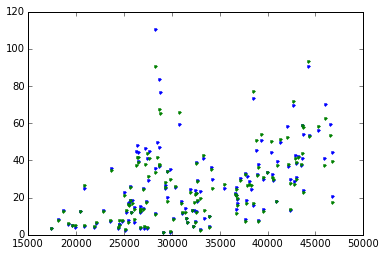

In [87]:
totald = popd + workd
nrides = databystation['nrides'].values
ndays = databystation['ndays'].values
#plt.plot(popd, nrides/ndays, '.')
#plt.plot(workd, nrides/ndays, '.')
plt.plot(totald, nrides/ndays, '.')
plt.plot(totald_allweek, nrides_allweek/ndays_allweek, '.')

In [ ]:
mbtaloc = '../Data/Boston/mbta.yaml'
mbtafile = open(mbtaloc, 'r')
mbta = yaml.load(configfile)
